<a href="https://colab.research.google.com/github/GabrielBatavia/Learn_TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definition for a regression problem but in our case, we're going to simplify it : predicting a numerical variable based on some other combination of variables, even shorter...predicting a number.

In [2]:
# Import TensorFlow

import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

In [3]:
import numpy as np
import matplotlib.pyplot as plt

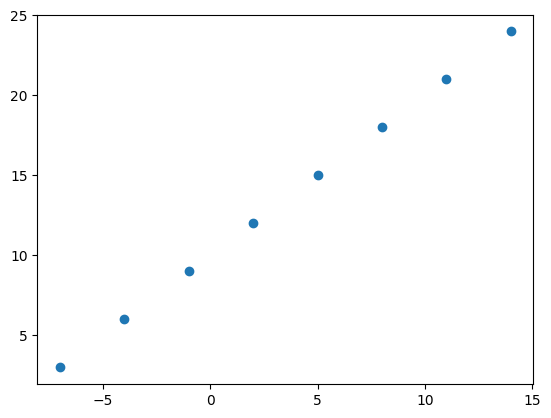

In [4]:
# Creating features

x = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize it
plt.scatter(x, y);

In [5]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [6]:
# Create a demo tensor for out housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
x[0], y[0]

(-7.0, 3.0)

In [8]:
input_shape = x[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [9]:
x[0].ndim

0

In [10]:
# Turn our Numpy arrays into tensors with dtype 32

X = tf.constant(x, dtype=tf.float32)
Y = tf.constant(y, dtype=tf.float32)

X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), ())

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **Compiling a model** - define the loss function (in other words, the function wich tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the preformance of our model)

3. Fitting a model - letting the model try to find patters between X & y (features and labels)

In [12]:
# Opetionally, the first layer can receive an 'input_shape' argument :
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))

# Afterwards, we do automatic shape inference :
# model.add(tf.keras.layers.Dense(4))

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))
# ...

In [13]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient decent
              metrics = ["mae"])

# 3. Fit the model
# model.fit(X, Y, epochs=5) # BREAK IN UPDATED TENSOR VERSION
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 20.9550 - mae: 20.9550
Epoch 2/5
1/1 [==============================] - 0s 32ms/step - loss: 20.5703 - mae: 20.5703
Epoch 3/5
1/1 [==============================] - 0s 29ms/step - loss: 20.2891 - mae: 20.2891
Epoch 4/5
1/1 [==============================] - 0s 33ms/step - loss: 20.0078 - mae: 20.0078
Epoch 5/5
1/1 [==============================] - 0s 26ms/step - loss: 19.7266 - mae: 19.7266


In [14]:
# Check our X and Y
x, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [15]:
# Try make prediction
model.predict([17.0])

1/1 [==============================] - 0s 211ms/step


array([[-21.73011]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - ere we might add more layers, increse the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might chang ethe optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn form)

In [16]:
# Let's rebuild our model

# 1. Create the model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
# model.fit(X, Y, epochs=5) # BREAK IN UPDATED TENSOR VERSION
model1.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 17.1306 - mae: 17.1306
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 16.8493 - mae: 16.8493
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 16.5681 - mae: 16.5681
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 16.2868 - mae: 16.2868
Epoch 5/100
1/1 [==============================] - 0s 48ms/step - loss: 16.0056 - mae: 16.0056
Epoch 6/100
1/1 [==============================] - 0s 36ms/step - loss: 15.7243 - mae: 15.7243
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 15.4431 - mae: 15.4431
Epoch 8/100
1/1 [==============================] - 0s 26ms/step - loss: 15.1618 - mae: 15.1618
Epoch 9/100
1/1 [==============================] - 0s 30ms/step - loss: 14.8904 - mae: 14.8904
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 14.7579 - mae: 14.7579
Epoch 11/100
1/1 [==============================] -

In [17]:
# Try make prediction
model1.predict([17.0])

1/1 [==============================] - 0s 197ms/step


array([[29.55529]], dtype=float32)

In [18]:
# re-write the model by my self and improve one thing to get better

# 1. Create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), # chang the optimizers from SGD to adam
              metrics = ["mae"])

# 3. Fit the model
# model.fit(X, Y, epochs=5) # BREAK IN UPDATED TENSOR VERSION
model2.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 8.4813 - mae: 8.4813
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 8.4768 - mae: 8.4768
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 8.4723 - mae: 8.4723
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 8.4678 - mae: 8.4678
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 8.4633 - mae: 8.4633
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 8.4588 - mae: 8.4588
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 8.4543 - mae: 8.4543
Epoch 8/100
1/1 [==============================] - 0s 62ms/step - loss: 8.4498 - mae: 8.4498
Epoch 9/100
1/1 [==============================] - 0s 37ms/step - loss: 8.4453 - mae: 8.4453
Epoch 10/100
1/1 [==============================] - 0s 46ms/step - loss: 8.4408 - mae: 8.4408
Epoch 11/100
1/1 [==============================] - 0s 59ms/step - loss

In [19]:
# Try make prediction
model2.predict([17.0])

1/1 [==============================] - 0s 157ms/step


array([[26.176851]], dtype=float32)

In [20]:
# re-write the model

# 1. Create the model (with 100 hidden units )
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model3.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"])

# 3. Fit the model
# model.fit(X, Y, epochs=5) # BREAK IN UPDATED TENSOR VERSION
model3.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 11.1794 - mae: 11.1794
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 10.4536 - mae: 10.4536
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 9.7170 - mae: 9.7170
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 8.9667 - mae: 8.9667
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 8.2005 - mae: 8.2005
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 7.4160 - mae: 7.4160
Epoch 7/100
1/1 [==============================] - 0s 36ms/step - loss: 6.9930 - mae: 6.9930
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 7.2109 - mae: 7.2109
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 7.4638 - mae: 7.4638
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 7.5963 - mae: 7.5963
Epoch 11/100
1/1 [==============================] - 0s 17ms/step - 

In [21]:
# Try make prediction
model3.predict([17.0])

1/1 [==============================] - 0s 323ms/step


array([[26.114536]], dtype=float32)

## Evaluating Model

Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...

Evaluation = visualize

it's good idea to visualize :
* The data - what data we working with? what does it look like?
* The model = what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the origin label)

In [22]:
# Make a bigger dataset

x = tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
# Make labels for the dataset

y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

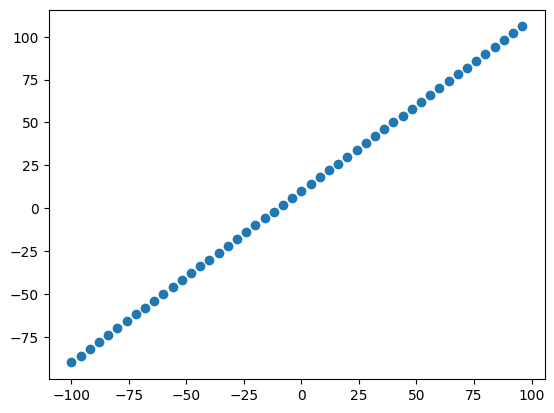

In [24]:
# Visualize the data

import matplotlib.pyplot as plt

plt.scatter(x, y)

### The 3 sets

* **Training set** - the model learn from this data, 70-80%
* **Validation set** - set model gets tuned on this data, 10-15%
* **Test set** - the model gets evaluated on this data, 10-15%

In [25]:
# Check the length of the data
len(x)

50

In [26]:
# Split the data into train and test sets
x_train = x[:40] # first to 40 data will be the training sample
y_train = y[:40]

x_test = x[40:] # 20% will be test
y_test = y[40:]

len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualing the data

Now we've got out data in training and test sets...lets visualize it

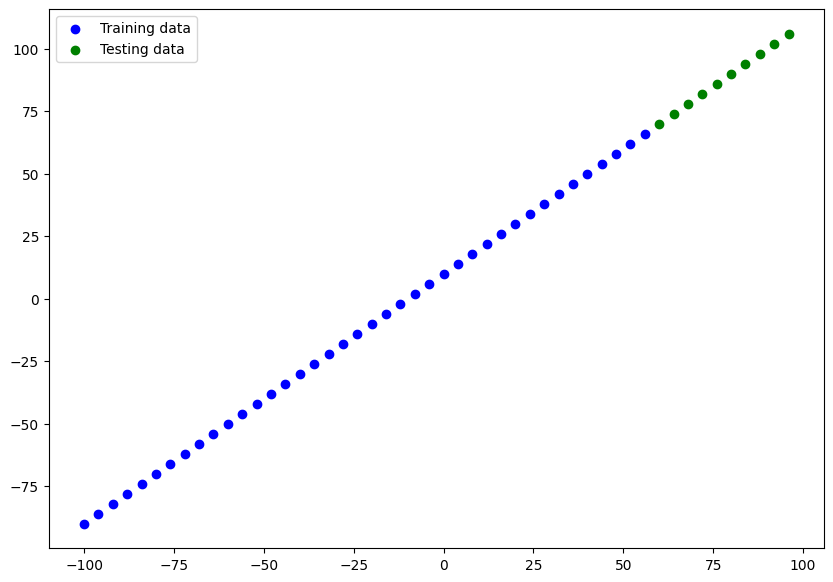

In [27]:
plt.figure(figsize=(10,7))

# Plot training data in blue
plt.scatter(x_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(x_test, y_test, c="g", label="Testing data")

# Show a legend
plt.legend();

In [28]:
# Lets have a look at how to build a neural network for our data

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
#model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [30]:
# Lets create  model wich builds automatically by defining the input_shape arguments

tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [31]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters that we have

* Trainable parameters - the parameters (patterns) the model can update as it trains

* Non-trainable params - parameters cant updated during training (allready learn in models during **transfer learning**)

📚 **Resource** : For a more in depth overview of the trainable parameters within a layer, check ouy MIT's intorduction to deep learning video

⚡**Exercise :** Try playing around with the number of hidden units in the dense layer, see how that effect the number of parameters

In [33]:
# 3. Fit the model
model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)